In [188]:
# Analyzing, cleaning, exploring data
import pandas as pd 
from pandas import DataFrame
import re

# Performing math operations on arrays and other structures.
import numpy as np

# Visualizing data
import matplotlib.pyplot as plt 


from sklearn.preprocessing import LabelEncoder

import pywt


## Importing data and extracting to a dataframe

In [189]:
import glob

new_list2 = []

columns = ['Timestamp', 'El1', 'El2', 'El3','El4', 'El5', 'El6','El7', 'El8']


# Specify the folder path where the CSV files are located
folder_path = "first_try/"

# Get a list of all CSV files in the folder
file_list = glob.glob(folder_path + "*.csv")

# Create an empty list to store the data from each CSV file
dataframes = []
total_num_rows = 0  # Variable to store the total number of rows
extracted_strings = []


# Loop through each CSV file, read it into a DataFrame, and append it to the list
for file in file_list:
    df = pd.read_csv(file, names=columns)
    num_rows = df.shape[0]
    
    file_name = file.split("/")[-1]  # Extract the file name from the file path
    extracted_string = re.search(r'-(.*?)-', file_name).group(1)  # Extract the desired string using regex
        
    extracted_strings.extend([extracted_string] * num_rows)
    
    
    extracted_numbers = re.findall(r'\d+', file)[0]

    
    new_list = [extracted_numbers] * num_rows
    new_list2.append(new_list)
    dataframes.append(df)
    
    total_num_rows += num_rows


# Concatenate all DataFrames in the list into a single DataFrame
data = pd.concat(dataframes, ignore_index=True)

new_list2 = [item for sublist in new_list2 for item in sublist]  # Flatten the nested list


In [190]:
data["P_ID"] = new_list2
data["Gesture"] = extracted_strings

In [191]:
le = LabelEncoder()
data['encoded_column'] = le.fit_transform(data['Gesture'])

In [192]:
data

,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,P_ID,Gesture,encoded_column
0,1643731093570,164,149,122,196,134,104,98,42,004,open,0
1,1643731093718,173,154,121,214,141,134,108,48,004,open,0
2,1643731093856,148,136,123,228,131,135,113,51,004,open,0
3,1643731093983,146,148,118,202,109,136,112,49,004,open,0
4,1643731094110,147,146,119,190,96,142,111,45,004,open,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1643730587674,62,91,75,219,89,63,82,32,004,open,0
5870,1643730587675,62,91,75,219,89,63,82,32,004,open,0
5871,1643730587680,59,84,70,204,94,84,69,28,004,open,0
5872,1643730587685,78,84,74,221,111,113,123,44,004,open,0


In [193]:
data.Gesture.value_counts()

open    5874
Name: Gesture, dtype: int64

In [194]:
data.Gesture.value_counts()

open    5874
Name: Gesture, dtype: int64

In [195]:
data.encoded_column.value_counts()

0    5874
Name: encoded_column, dtype: int64

## Data Cleaning

In [196]:
data.describe(include="all")

,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,P_ID,Gesture,encoded_column
count,5.874000e+03,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874,5874,5874.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,004,open,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5874,5874,NaN
mean,1.643732e+12,125.660878,132.586994,100.559074,225.100783,109.529792,121.155941,100.131256,38.670582,NaN,NaN,0.0
std,1.072016e+06,51.862863,26.428653,27.693219,55.993615,30.364316,47.296103,34.700685,10.604716,NaN,NaN,0.0
min,1.643730e+12,43.000000,68.000000,48.000000,107.000000,48.000000,33.000000,27.000000,21.000000,NaN,NaN,0.0
25%,1.643731e+12,81.000000,114.000000,82.000000,187.000000,91.000000,86.000000,79.000000,32.000000,NaN,NaN,0.0
50%,1.643732e+12,103.000000,129.000000,95.000000,215.000000,104.000000,122.000000,99.000000,36.000000,NaN,NaN,0.0
75%,1.643733e+12,174.000000,148.000000,113.000000,251.000000,120.000000,151.000000,122.000000,43.000000,NaN,NaN,0.0


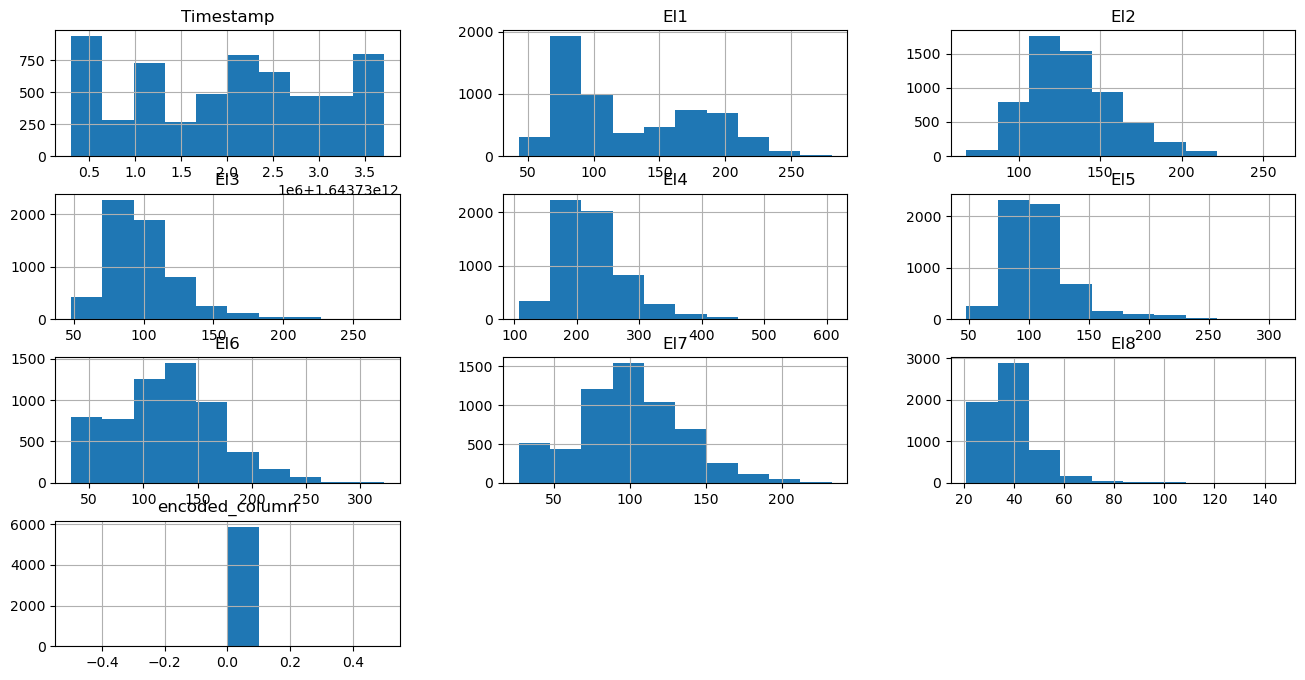

In [197]:
hist = data.hist(figsize=(16, 8))

In [198]:
# Take time and one column and convert it into a wavelet transform

In [199]:
time_data = data['Timestamp'].values

In [200]:
electrode1_data = data['El1'].values

In [201]:
time_data

array([1643731093570, 1643731093718, 1643731093856, ..., 1643730587680,
       1643730587685, 1643730587685])

In [202]:
electrode1_data

array([164, 173, 148, ...,  59,  78,  78])

In [205]:
wavelet = 'db4'

In [206]:
coeffs = pywt.wavedec(electrode_data, wavelet)

In [207]:
coeffs

[array([3466.58285555, 3478.26155662, 3466.61528592, 3463.87966697,
        3544.93957031, 3185.59322579, 2180.61622846, 3843.35870621,
        4340.56197181, 3127.98283543, 2449.88954059, 1890.5634237 ,
        3113.84803003, 2359.18754473, 2832.24133959, 3187.42011063,
        1821.78314086, 1460.3817272 ]),
 array([  -1.37712226,   -2.92352489,   16.79396946, -176.38056331,
         283.81397764, -119.56311595,  227.67368078, 1087.23097524,
        -335.02612096,  456.67055606,  593.48642156,  -53.53759993,
         103.69289785, -623.64038449,  184.89627359,   -5.2760053 ,
         557.68833731, -267.58852876]),
 array([ 4.27401724e-01,  2.61759498e+00,  4.23747101e+01,  1.01411615e+02,
        -1.67899832e+01, -3.60727142e+02, -2.62595339e+02, -1.08139548e+02,
        -1.45294908e+02,  1.14828605e+02,  2.14547377e+02, -1.35632696e+02,
         2.45469334e+02, -1.26820179e+02, -6.57521232e+01, -2.18163899e+02,
        -1.70726536e+02,  1.17643593e+02, -3.04293708e+02,  6.90629562e+

In [208]:
type(coeffs)

list

In [187]:
len(coeffs)

10

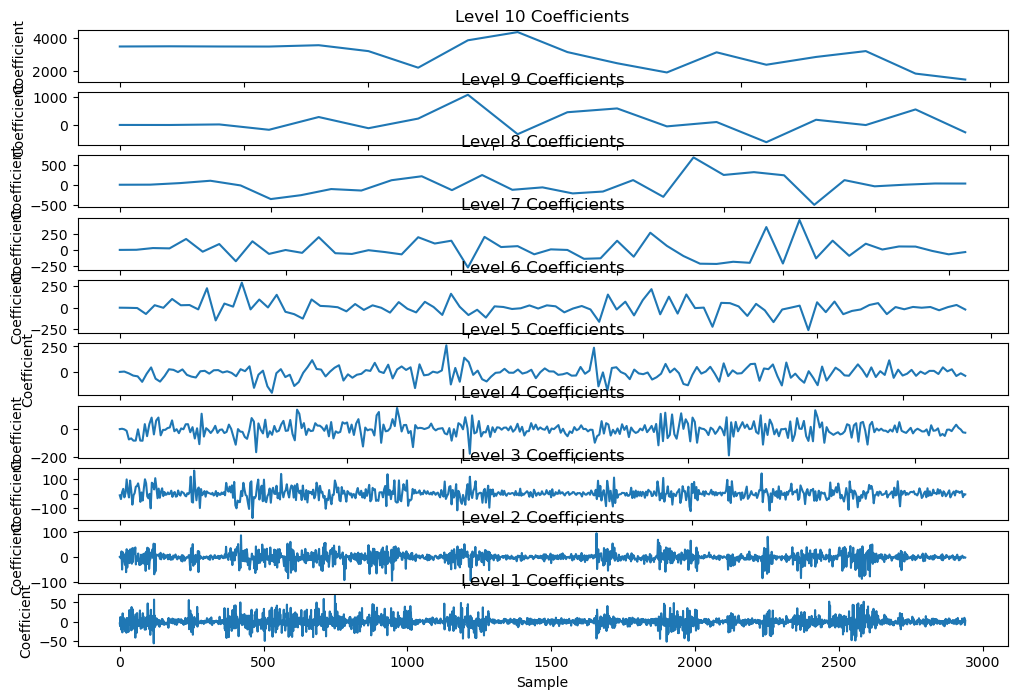

In [166]:
# Plot the wavelet coefficients
levels = len(coeffs)
plt.figure(figsize=(12, 8))

for i in range(levels):
    level = levels - i
    plt.subplot(levels, 1, i+1)
    plt.plot(coeffs[i])
    plt.title(f'Level {level} Coefficients')
    plt.xlabel('Sample')
    plt.ylabel('Coefficient')

plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


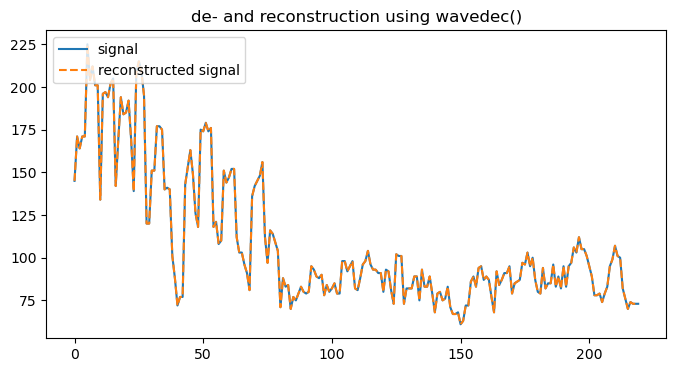

In [167]:
coeffs = pywt.wavedec(electrode1_data, 'db4', level=8)
reconstructed_signal = pywt.waverec(coeffs, 'db4')
 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(electrode1_data[:1000], label='signal')
ax.plot(reconstructed_signal[:1000], label='reconstructed signal', linestyle='--')
ax.legend(loc='upper left')
ax.set_title('de- and reconstruction using wavedec()')
plt.show()

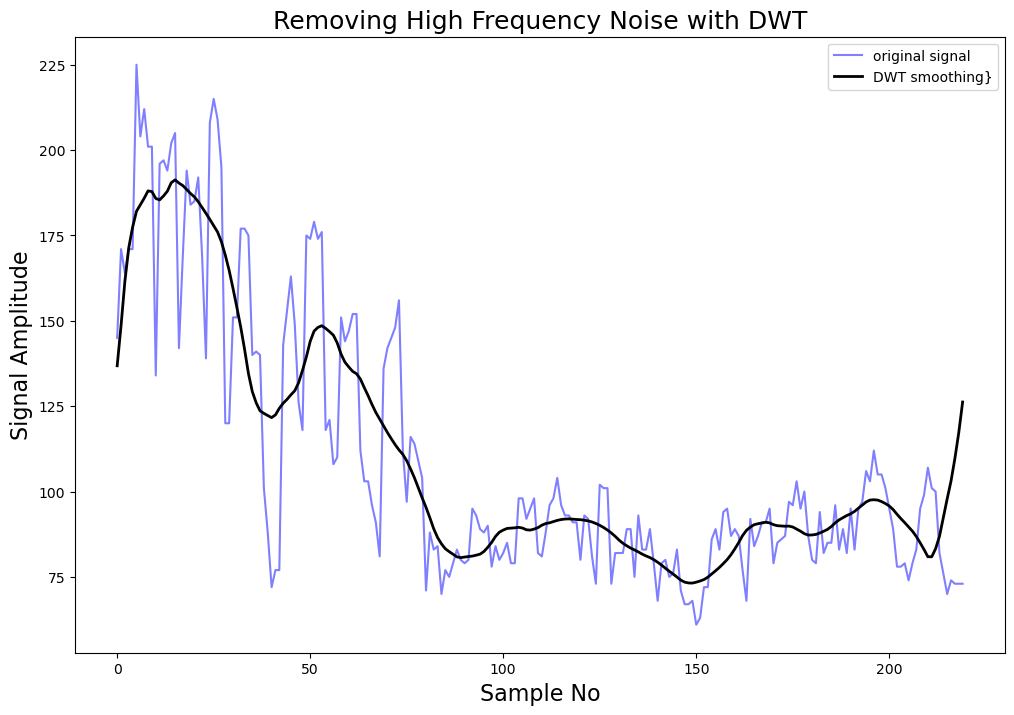

In [168]:
signal = electrode1_data
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()

## END

In [28]:
"""
0 - close
1 - grasp
2 - lateral
3 - neutral
4 - open 
5 - tripod

"""

'\n0 - close\n1 - grasp\n2 - lateral\n3 - neutral\n4 - open \n5 - tripod\n\n'

In [31]:
combined_df.isnull().sum().sort_values(ascending=False)

Timestamp         0
El1               0
El2               0
El3               0
El4               0
El5               0
El6               0
El7               0
El8               0
P_ID              0
Gesture           0
encoded_column    0
dtype: int64

In [32]:
skewness = combined_df.skew(axis = 0, skipna = True)
skewness

/var/folders/qx/kwxzb4sj2bjbxg1dwdlypnxc0000gn/T/ipykernel_1834/4196173924.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = combined_df.skew(axis = 0, skipna = True)


Timestamp        -0.036985
El1               0.543554
El2               0.684240
El3               1.603463
El4               1.472049
El5               2.081289
El6               0.325803
El7               0.310969
El8               2.344220
P_ID              0.000000
encoded_column    0.000000
dtype: float64

In [33]:
# Data is slightly skewed


## Splitting data according to Patient IDs

In [34]:
patients = combined_df['P_ID'].unique()

In [35]:
gf = combined_df.groupby('P_ID')

gf.first('P_ID')


,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,encoded_column
P_ID,,,,,,,,,,
004,1643731093570,164,149,122,196,134,104,98,42,0


In [36]:
# Creating a dataframe for each P_ID
d = {}
for p in patients:
    d[p] = pd.DataFrame()

len(patients)

1

In [37]:
for p, new_df in d.items():
    d[p] = gf.get_group(p)
    print(p)

004


In [38]:
d["004"]

,Timestamp,El1,El2,El3,El4,El5,El6,El7,El8,P_ID,Gesture,encoded_column
0,1643731093570,164,149,122,196,134,104,98,42,004,open,0
1,1643731093718,173,154,121,214,141,134,108,48,004,open,0
2,1643731093856,148,136,123,228,131,135,113,51,004,open,0
3,1643731093983,146,148,118,202,109,136,112,49,004,open,0
4,1643731094110,147,146,119,190,96,142,111,45,004,open,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5869,1643730587674,62,91,75,219,89,63,82,32,004,open,0
5870,1643730587675,62,91,75,219,89,63,82,32,004,open,0
5871,1643730587680,59,84,70,204,94,84,69,28,004,open,0
5872,1643730587685,78,84,74,221,111,113,123,44,004,open,0
